In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

In [6]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [7]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

In [8]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

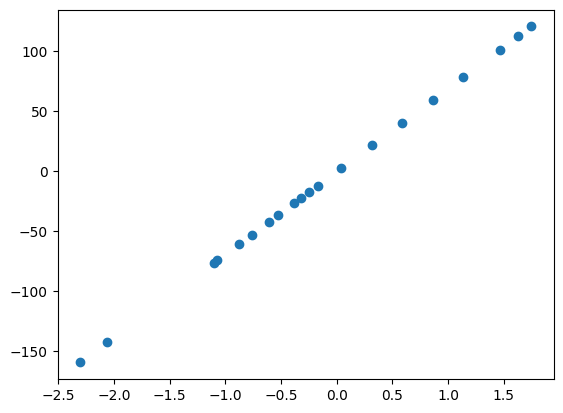

In [9]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [10]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        return self.b0 + self.b1 * x

    def error(self, X, Y):
        return sum((self.predict(X) - Y)**2) / (2 * len(X))

    def fit(self, X, Y):
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [11]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


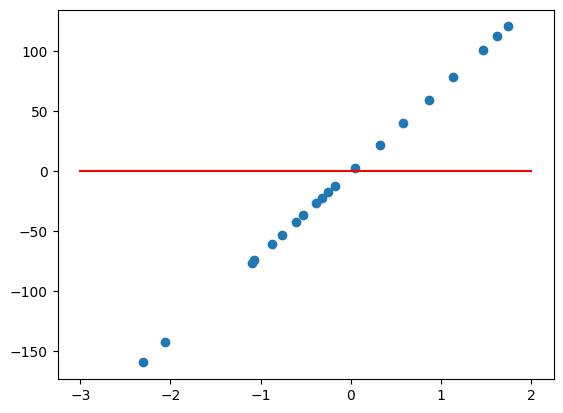

In [12]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [13]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


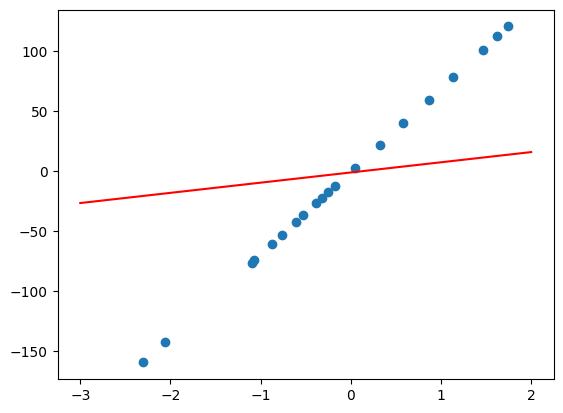

In [14]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Модифицируем метод так, чтобы он запускался в цикле определенное количество раз:

In [15]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [16]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


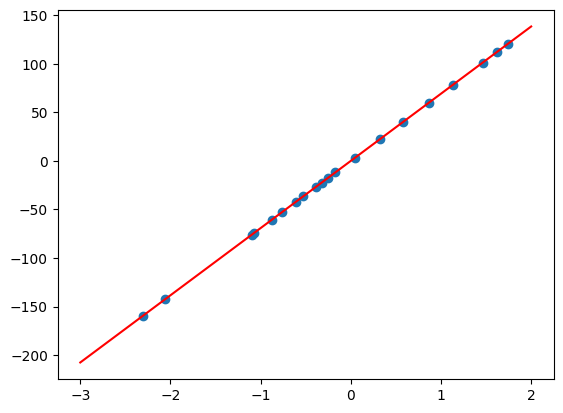

In [17]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

 Линия регрессии довольно похожа на оптимальную. Так ли это на самом деле, глядя на график, сказать сложно, для этого нужно проанализировать, как ошибка регрессии менялась со временем:

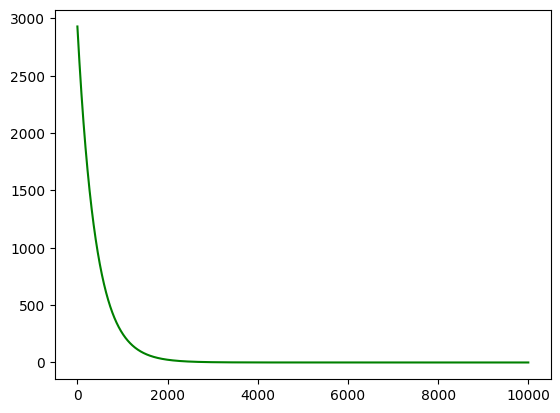

In [18]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

# Задания для самостоятельного выполнения

---








### 1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.


In [19]:
def display_plot(x, y, hyp):
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("error after gradient descent:", J)

    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

error after gradient descent: 1.656741680078997e-06


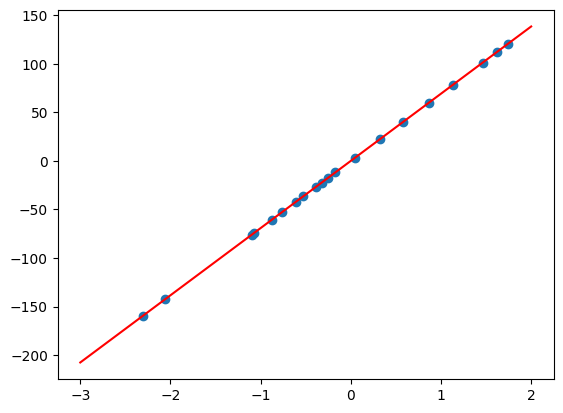

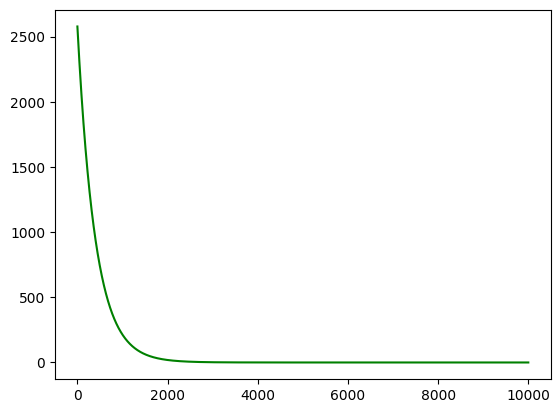

In [20]:
hyp.b0 = 5
hyp.b1 = 5

display_plot(x, y, hyp)

### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.


error after gradient descent: 1.6583631164782415e-27


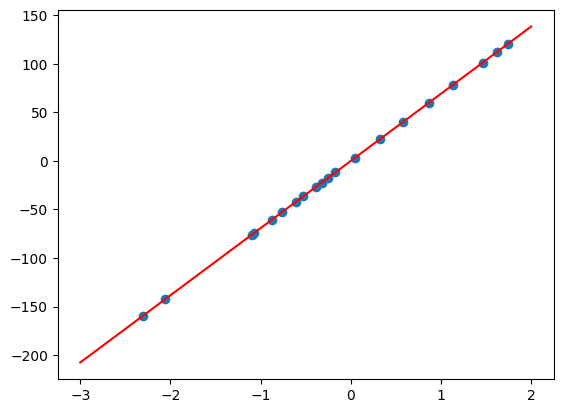

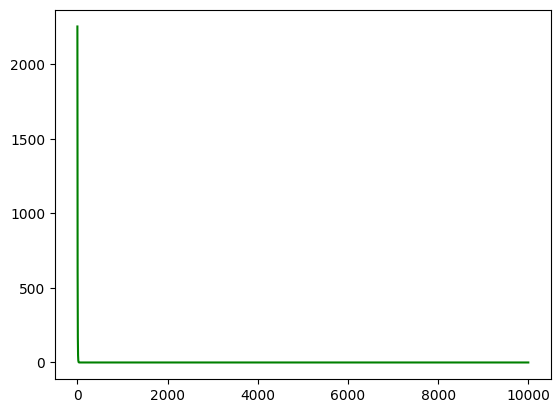

'Если модель расходится при увеличении значения скорости обучения, то можно сделать вывод,\nчто значение скорости обучения слишком велико.\nЕсли модель расходится при уменьшении значения скорости обучения,\nто можно сделать вывод, что значение скорости обучения слишком мало.'

In [21]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.1, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

hyp = Model()
display_plot(x, y, hyp)
'''Если модель расходится при увеличении значения скорости обучения, то можно сделать вывод,
что значение скорости обучения слишком велико.
Если модель расходится при уменьшении значения скорости обучения,
то можно сделать вывод, что значение скорости обучения слишком мало.'''

### 3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

<ipython-input-27-c5c6c3e3fe03>:11: RuntimeWarning: overflow encountered in square
  return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
<ipython-input-27-c5c6c3e3fe03>:18: RuntimeWarning: overflow encountered in add
  dJ1 = sum((self.predict(X) - Y) * X) /len(X)
<ipython-input-27-c5c6c3e3fe03>:20: RuntimeWarning: invalid value encountered in subtract
  self.b1 -= alpha * dJ1


error after gradient descent: [nan]


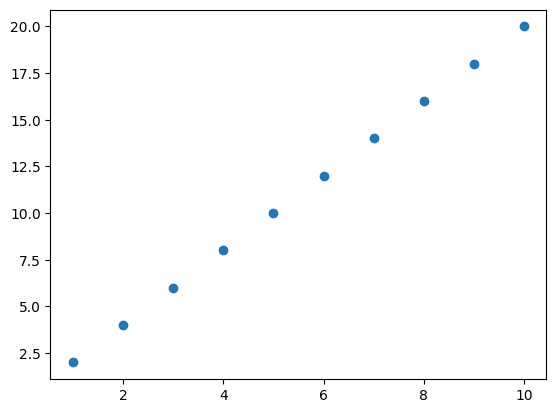

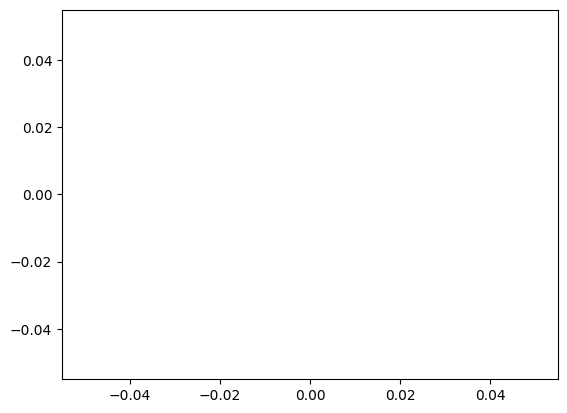

error after gradient descent: [nan]


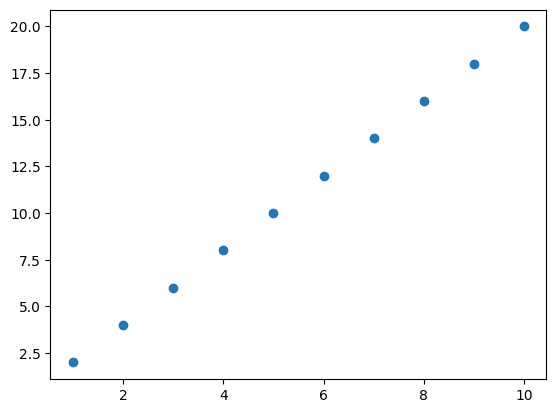

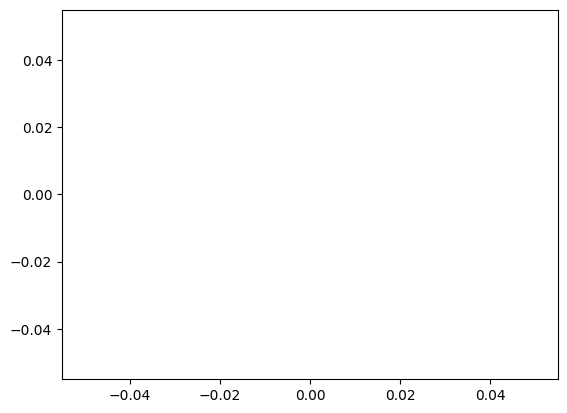

'В этом коде мы создаем экземпляр класса Model и два набора данных: Series и DataFrame.\nЗатем мы преобразуем эти наборы данных в нужный формат с помощью метода handle_data.\nНаконец, мы обучаем модель на преобразованных наборах данных.'

In [27]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.1, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

    def handle_data(self, data):
        if isinstance(data, pd.Series):
            return data.values.reshape(-1, 1)
        elif isinstance(data, pd.DataFrame):
            if data.isnull().sum().sum() > 0:
                raise ValueError("DataFrame contains missing values")
            return data.values
        else:
            raise TypeError("Data must be a Series or DataFrame")

hyp = Model()
x = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = pd.Series([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Преобразование Series в нужный формат
x = hyp.handle_data(x)
y = hyp.handle_data(y)

# Обучение модели на Series
hyp.fit(x, y)

display_plot(x, y, hyp)

# Создание DataFrame
df = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]})

# Преобразование DataFrame в нужный формат
df = hyp.handle_data(df)

# Обучение модели на DataFrame
hyp.fit(df[:, 0], df[:, 1])

display_plot(x, y, hyp)

'''В этом коде мы создаем экземпляр класса Model и два набора данных: Series и DataFrame.
Затем мы преобразуем эти наборы данных в нужный формат с помощью метода handle_data.
Наконец, мы обучаем модель на преобразованных наборах данных.'''

### 4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.
### 5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

Достигнуто минимальное значение изменения ошибки!
error after gradient descent: 0.003731569155222469


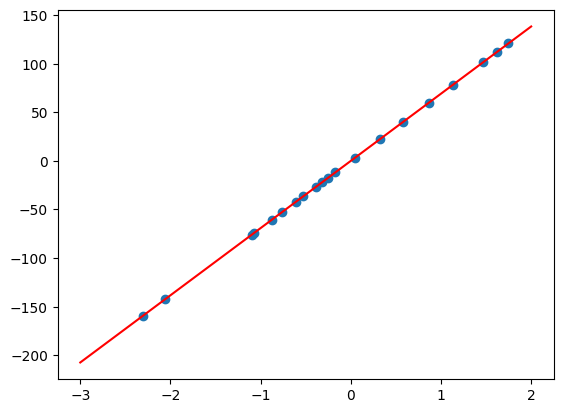

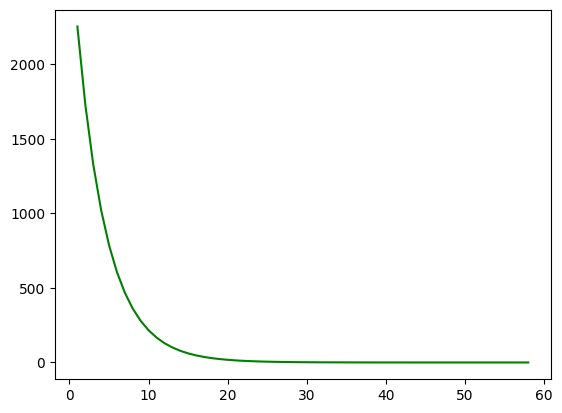

'В этом коде, если разница между ошибками на текущем и предыдущем шаге меньше accuracy, то цикл прекращается.\nТакже в этом коде, если алгоритм достигает максимального количества шагов, он завершается независимо от того, \nкак он достигает минимальной ошибки.'

In [41]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.1, accuracy=0.001, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_err = np.inf
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            if prev_err - new_err < accuracy:
                print("Достигнуто минимальное значение изменения ошибки!")
                break
            prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step == max_steps - 1:
                print("Достигнуто максимальное количество шагов!")
                break
        return steps, errors

    def handle_data(self, data):
        if isinstance(data, pd.Series):
            return data.values.reshape(-1, 1)
        elif isinstance(data, pd.DataFrame):
            if data.isnull().sum().sum() > 0:
                raise ValueError("DataFrame contains missing values")
            return data.values
        else:
            raise TypeError("Data must be a Series or DataFrame")

x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']
hyp = Model()
display_plot(x, y, hyp)

'''В этом коде, если разница между ошибками на текущем и предыдущем шаге меньше accuracy, то цикл прекращается.
Также в этом коде, если алгоритм достигает максимального количества шагов, он завершается независимо от того,
как он достигает минимальной ошибки.'''

### 6. Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.
### 7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

Достигнуто максимальное количество шагов!
error after gradient descent: 1.848005278093373e-27


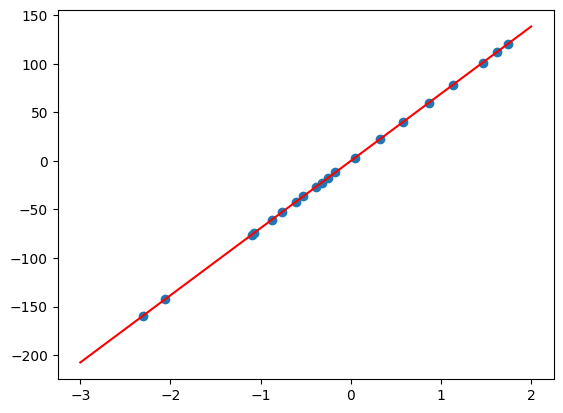

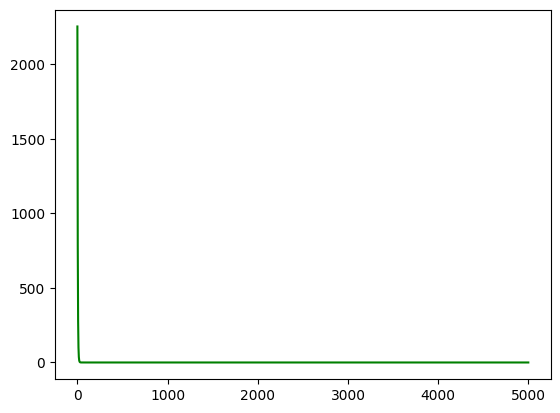

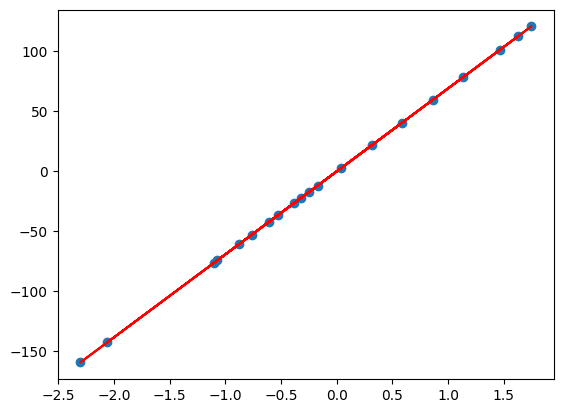

'В этом коде, если ошибка после одного шага увеличивается, скорость обучения уменьшается вдвое. \nЕсли ошибка не увеличивается, скорость обучения не меняется.'

In [42]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.1, accuracy=0.001, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_err = np.inf
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            if prev_err < new_err:
                alpha /= 2
                self.b0 -= alpha * dJ0
                self.b1 -= alpha * dJ1
            else:
                prev_err = new_err
            step += 1
            steps.append(step)
            errors.append(new_err)
            if step == max_steps - 1:
                print("Достигнуто максимальное количество шагов!")
                break
        return steps, errors

    def handle_data(self, data):
        if isinstance(data, pd.Series):
            return data.values.reshape(-1, 1)
        elif isinstance(data, pd.DataFrame):
            if data.isnull().sum().sum() > 0:
                raise ValueError("DataFrame contains missing values")
            return data.values
        else:
            raise TypeError("Data must be a Series or DataFrame")

    def plot_data(self, X, Y):
        plt.scatter(X, Y)
        plt.plot(X, self.predict(X), color='red')
        plt.show()

hyp = Model()
display_plot(x, y, hyp)
hyp.plot_data(x, y)
'''В этом коде, если ошибка после одного шага увеличивается, скорость обучения уменьшается вдвое.
Если ошибка не увеличивается, скорость обучения не меняется.'''
'''Метод plot_data рисует точки данных и линию регрессии.
Он использует метод scatter для точек данных и метод plot для линии регрессии.'''